# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [28]:
def apply_svd_custom(X_train, X_test, n_components):
    cov = np.dot(X_train.T, X_train) / X_train.shape[0]
    eigenvalues, eigenvectors = np.linalg.eigh(cov)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, sorted_indices]
    eigenvalues = eigenvalues[sorted_indices]

    U = eigenvectors[:, :n_components]
    X_train_reduced = np.dot(X_train, U)
    X_test_reduced = np.dot(X_test, U)

    return X_train_reduced, X_test_reduced, U


## Part 3: Train Logistic Regression and Measure Performance

In [22]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42)

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [38]:
svd_components = [i for i in range(5, 11)] + [i for i in range(20, 110, 10)] + [i for i in range(300, 800, 100)] + [784]

# Store the results
results = []
top_five = {}

print("Training models with different levels of SVD preprocessing...\n")
for n_components in svd_components:
    if n_components <= 7 or n_components >= 600:
      print(f"Applying custom SVD with {n_components} components...")
    if n_components == 8:
      print("\n...\n")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, U = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))
    if len(top_five) < 5:
      top_five[accuracy] = U
    else:
      worst = min(top_five)
      if accuracy > worst:
        del top_five[worst]
        top_five[accuracy] = U

    if n_components <= 7 or n_components >= 600:
      print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...

Applying custom SVD with 5 components...
SVD components: 5, Accuracy: 0.6659, Training time: 1.6233 seconds
Applying custom SVD with 6 components...
SVD components: 6, Accuracy: 0.7292, Training time: 0.7275 seconds
Applying custom SVD with 7 components...
SVD components: 7, Accuracy: 0.7570, Training time: 0.7734 seconds

...

Applying custom SVD with 600 components...
SVD components: 600, Accuracy: 0.9205, Training time: 676.8753 seconds
Applying custom SVD with 700 components...
SVD components: 700, Accuracy: 0.9209, Training time: 774.2875 seconds
Applying custom SVD with 784 components...
SVD components: 784, Accuracy: 0.9209, Training time: 865.1390 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


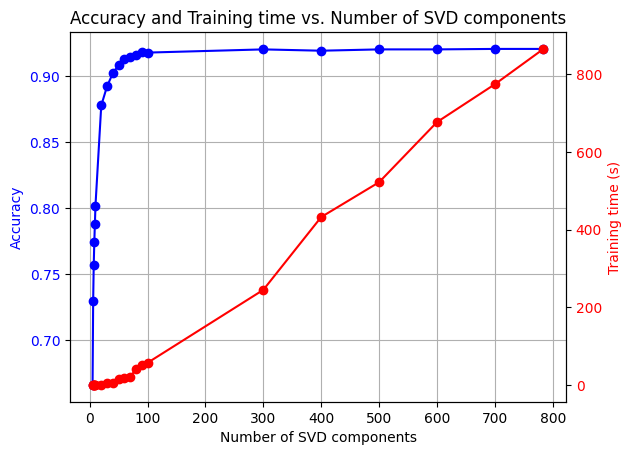

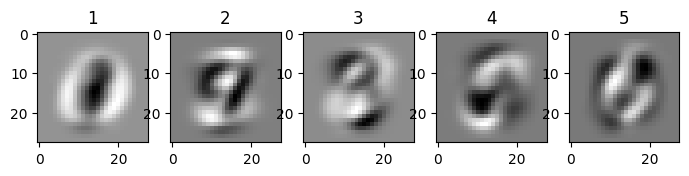

In [48]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

# Plot the results
results = np.array(results)
fig, ax1 = plt.subplots()

ax1.plot(results[:, 0], results[:, 1], 'o-', color='blue', label='Accuracy')
ax1.set_xlabel('Number of SVD components')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(results[:, 0], results[:, 2], 'o-', color='red', label='Training time (s)')
ax2.set_ylabel('Training time (s)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Accuracy and Training time vs. Number of SVD components')
plt.show()


plt.figure(figsize=(10, 2))
for i in range(1, 6):
	plt.subplot(1, 6, i+1)
	plt.imshow(top_five[0.9205][:, i].reshape(28, 28), cmap='gray')
	plt.title(f"{i}")
plt.show()

## Part 6: Analyze / Conclusion

YOUR ANSWER:

Both accuracy and training time increase as a function of number of components used. However, these variables do not increase with the same relationship to number of components. Accuracy's growth seems logarithmic, growing extremely fast for low number of components, but plateauing around 92% accuracy. On the other hand, training time appears to increase linearly, constantly growing. Since accuracy is asymptotically bounded and training time is unbounded, it seems reasonable to attempt to achieve a high accuracy with the fewest components possible. For example, there is no major difference in accuracy between 100 and the full 784 components; however, the training time is increased by roughly 8 times. It is unnecessary to expend such significant computational power to see a negligible difference in accuracy.